<a href="https://colab.research.google.com/github/gingerthorp/deepLeaning/blob/master/study/5_Learn%20the%20training%20Know-how/DL5_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\eta = eta, \times = times, \partial = partial, \frac{a}{b} = frac, \sum^n_{i=1}i = sum, \alpha = alpha$

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [4]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

In [6]:
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

## 검증 세트 준비하기

In [7]:
print("x total size : ",len(x))
print("x_train_all size : ",len(x_train_all))
print("x_test size : ", len(x_test))


x total size :  569
x_train_all size :  455
x_test size :  114


In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

print("x total size : ",len(x))       # 전체 데이터 사이즈  :100
print("x_train size : ",len(x_train)) # 학습 데이터 사이즈  :64
print("x_val size : ", len(x_val))    # 검증 데이터 사이즈  :16
print("x_test size : ", len(x_test))  # 테스트 데이터 사이즈 :20

x total size :  569
x_train size :  364
x_val size :  91
x_test size :  114


In [9]:
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train,y_train)
sgd.score(x_val, y_val)

0.6923076923076923

#### 스케일을 조정하지 않고 모델을 훈련해 볼까요?

1. 훈련 데이터 준비하고 스케일 비교하기

In [10]:
from matplotlib import pyplot as plt
import numpy as np

['mean perimeter' 'mean area']


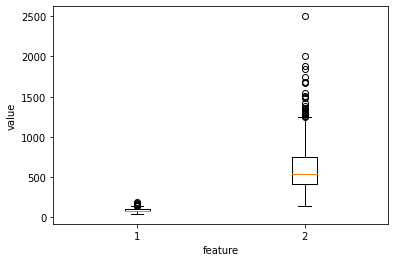

In [11]:
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:,[2,3]])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [12]:
class SingleLayer:
  def __init__(self, learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []
    self.lr = learning_rate

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   # 직선 방정식을 계산합니다.
    return z

  def backprop(self, x, err):
    w_grad = x * err                  # 가중치에 대한 그레이디언트를 계산합니다.
    b_grad = 1 * err                  # 절편에 대한 그레이디언트를 계산합니다.
    return w_grad, b_grad
  
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
    self.b = 0                        # 절편을 초기화합니다.
    self.w_history.append(self.w.copy())# 가중치를 기록합니다.
    np.random.seed(42)                # 무작위로 시드를 지정합니다.
    for i in range(epochs):           # epochs만큼 반복합니다.
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
      for i in indexes:      # 모든 샘플에 대해 반복합니다.
        z = self.forpass(x[i])         # 정방향 계산
        a = self.activation(z)         # 활성화 함수 적용
        err = -(y[i] - a)              # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
        self.w -= self.lr * w_grad     # 가중치 업데이트(학습률 적용)
        self.b -= b_grad               # 절편 업데이트
        self.w_history.append(self.w.copy())  # 가중치를 기록합니다.
        
        a = np.clip(a, 1e-10, 1-1e-10) # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다.
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))  # 에포크마다 평균 손실을 저장합니다.
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [13]:
layer1 = SingleLayer()

In [14]:
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


0.9120879120879121

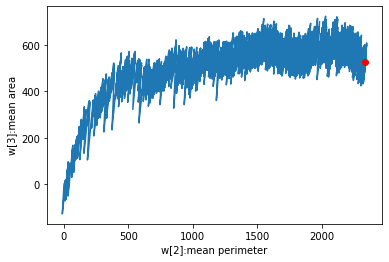

In [15]:
w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1],'ro')
plt.xlabel('w[2]:mean perimeter')
plt.ylabel('w[3]:mean area')
plt.show()


그래프를 보면 mean perimeter에 비해 mean area의 스케일 값이 크므로 w3값이 학습 과정에서 큰 폭으로 흔들리며 변화하고 있습니다.

이 그래프 현상으 'w3에 대한 그레이디언트가 크기 때문에 w3축을 따라 가중치가 요동치고 있다'라고 말합니다.

즉, 가중치의 최적값에 도달하는 동안 w3값이 크게 요동치므로 모델이 불안정하게 수렴한다는 것을 알수 있습니다.

이를 해결하기 위해 스케일을 조절해야 합니다.

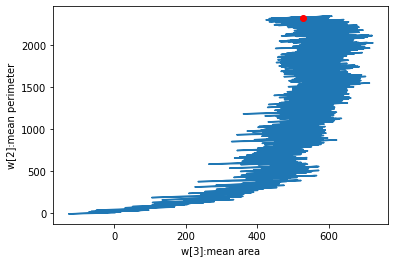

In [16]:
w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w3, w2)
plt.plot(w3[-1], w2[-1],'ro')
plt.ylabel('w[2]:mean perimeter')
plt.xlabel('w[3]:mean area')
plt.show()

In [17]:
print("(w[2], w[3]) : ", w2[-1], ":", w3[-1])

(w[2], w[3]) :  2330.6013372131115 : 526.7779780348875


### 스케일을 조정해 모델을 훈련합니다.

신경망에서 자주 사용하는 스케일 조정 방법 중 하나는 표준화(standardization)입니다.

표준화는 특성값에서 평균을 빼고 표준 편차로 나누면 됩니다.
표준화를 하면 평균이 0이고 분산이 1인 특성이 만들어집니다.

표준화 공식  
$z = {x - \mu \over s}$

표준편차 공식
$s = \sqrt{{1 \over m}\sum_{i=0}^m {(x_i-\mu)}^2	}$

$m은 샘플의 수이고 \mu는 평균 입니다.$

In [18]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean)/train_std

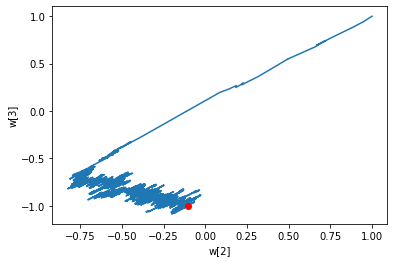

In [19]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [20]:
layer2.score(x_val, y_val)

0.37362637362637363

In [21]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(y_val, axis=0)
x_val_scaled = (x_val - val_mean)/val_std
layer2.score(x_val_scaled,y_val)

0.9340659340659341

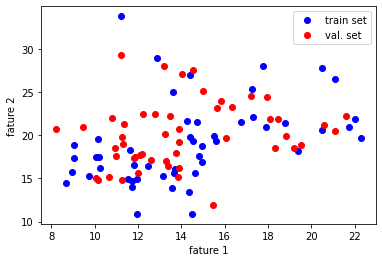

In [22]:
plt.plot(x_train[:50, 0], x_train[:50,1],'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

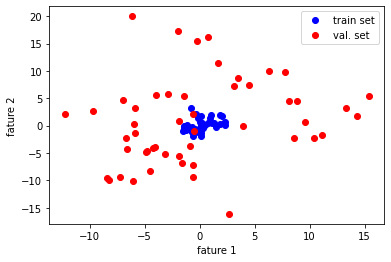

In [23]:
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

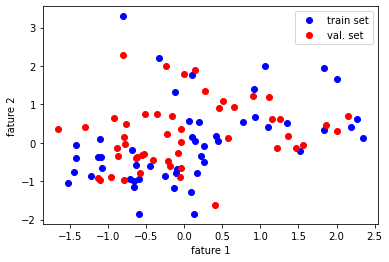

In [24]:
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [25]:
layer2.score(x_val_scaled, y_val)

0.967032967032967

### 5.2 과대적합과 과소적합을 알아봅니다.

과대적합 : 훈련 세트에 충분한 샘플 없어서 발생함, 분산이 크다, 훈련 샘플 모이기 힘든 경우 훈련 세트에 집착하지 않도록 가중치를 제한.  
과소적합 : 모델이 충분하게 복잡하지 않아서 발생함, 편향이 크다, 패턴을 모두 잡아내지 못함, 복잡도가 더 높은 모델을 사용하거나 가중치의 규제를 완화하는 것.



In [28]:
class SingleLayer:
  def __init__(self, learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_history = []
    self.lr = learning_rate

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   # 직선 방정식을 계산합니다.
    return z

  def backprop(self, x, err):
    w_grad = x * err                  # 가중치에 대한 그레이디언트를 계산합니다.
    b_grad = 1 * err                  # 절편에 대한 그레이디언트를 계산합니다.
    return w_grad, b_grad
  
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
    return a

  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
    self.b = 0                        # 절편을 초기화합니다.
    self.w_history.append(self.w.copy())# 가중치를 기록합니다.
    np.random.seed(42)                # 무작위로 시드를 지정합니다.
    for i in range(epochs):           # epochs만큼 반복합니다.
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
      for i in indexes:      # 모든 샘플에 대해 반복합니다.
        z = self.forpass(x[i])         # 정방향 계산
        a = self.activation(z)         # 활성화 함수 적용
        err = -(y[i] - a)              # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
        self.w -= self.lr * w_grad     # 가중치 업데이트(학습률 적용)
        self.b -= b_grad               # 절편 업데이트
        self.w_history.append(self.w.copy())  # 가중치를 기록합니다.
        
        a = np.clip(a, 1e-10, 1-1e-10) # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다.
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))  # 에포크마다 평균 손실을 저장합니다.
      self.losses.append(loss/len(y))  # 에포크마다 평균 손실을 저장합니다.
      self.update_val_loss(x_val, y_val)

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

  def update_val_loss(self, x_val, y_val):
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val))

In [29]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

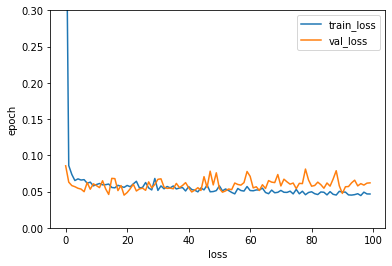

In [30]:
plt.ylim(0,0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

In [31]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)

0.978021978021978

### 5.3 규제 방법을 배우고 단일층 신경망에 적용합니다.

가중치 규제 : 과대적합을 해결하는 대표적인 방법 중 하나
- 가중치의 값이 커지지 않도록 제하는 기법
- 가중치를 규제하면 모델의 일반화 성능이 올람감.

**그래프가 점을 잘 표현하는 정도**  
경사가 급한 그래프  <  경사가 완만한 그래프

샘플데이터에 딱 맞는 그래프?
-> 모델이 일반화되지 않았다.


#### L1 규제를 알아봅니다.

L1 규제는 손실함수에 가중치의 절댓값이 L1 노름(norm)을 추가합니다.

$||w||_1 = \sum_{i=0}^n|w_i|$

소문자 알파벳(w)은 백터를 의미합니다.  
n은 가중치의 개수를 의미합니다.  
L1규제를 '가중치의 절댓값을 손실함수에 더한 것'  

다음은 로지스틱 손실함수입니다. 이 함수에 L1규제를 적용해보겠습니다.

$L = -1(y\log(a) + (1-y)\log(1-a)) + \alpha\sum^n_{i=1}|w_i|$

$\alpha$는 L1 규제의 양을 조절하는 하이퍼파라미터입니다.
예를 들어 $\alpha$값이 크면 전체 손실함수의 값이 커지지 않도록 $w$값이 작아져야 합니다.   
이것을 보고 규제가 강해졌다고 합니다.(가중치가 작아졌으므로).   
반대로 $\alpha$값이 작으면 $w$의 합이 커져도 손실함수의 값이 큰 폭으로 커지짖 않습니다.  
즉, 규제가 약해집니다.

경사 하강법으로 가중치를 업데이트하기 위하여 L1규제를 적용한 로지스틱 손실 함수를 미분해 보겠습니다.

#### L1 규제의 미분

절대값 |w|를 w에 대해 미분하면 w값의 부호만 남기 때문에(w가 양수이면 +1, 음수이면 -1)w값을 미분한 결과인 w의 부호라는 의미로 sign(w)이라고 표현합니다. L1 규제를 적용한 손실함수의 도함수는 다음과 같습니다.

$\frac{\partial}{\partial w}L = -(y-a)x+\alpha  \times sign(w)$


가중치 벡터 w에 대한 미분으로 확장하여 식을 전개했습니다.  
이 식을 가중치 업데이트 식에 적용하면 다음과 같습니다. L1규제에 5-1에서 배운 학습률도 적용해 보겠습니다.
L1규제를 적용한 손실함수의 도함수에 학습률을 곱하면 됩니다.  
다음 수식에서 $\eta$가 학습률입니다.

$w = w - \eta\frac{\partial L}{\partial w} = w + \eta((y-a)x - \alpha \times sign(w))$

위 수식을 보니 L1 규제를 추가한 로지스틱 손실함수를 경사 하강법으로 최적화하는 것도 어렵지 않을 것 같습니다. 규제 하이퍼파리미터  a와 가중치의 부호를 곱해서 업데이트할 그레이디언트에 더해 주면 됩니다. 파이썬 코드로 작성하면 다음과 같습니다.

w_grad += alpha * np.sign(w)

여기에서 alpha변수가 규제 하이퍼파라미터입니다.
np.sing()함수는 배열 요소의 부호를 반환합니다.
위 식에서 주의 깊게 볼 것이 하나 있습니다.
바로 절편에 대해 규제를 하지 않는다는 점입니다. 절편은 모델에 영향을 미치는 방식이 가중치와 다르기 때문입니ㅏㄷ. 절편을 규제하면 모델을 어떤 방향으로 이동시킬 뿐 복잡도에는 영향을 주지 않습니다. SGDClassifier클래스에서는 penalty 매개변수 값을 l1으로 지정하는 방법으로 L1규제를 적용할 수 있습니다. 또 규제의 강도를 제어하는 하이퍼파라미터 $\alpha$를 위한 alpha매개변수를 제공합니다.

**회귀 모델에 L1 규제를 추가한 것을 라쏘 모델이라 합니다.**
회귀 모델에도 같은 원리를 적용하여 손실함수(제곱오차)에 L1규제를 적용할 수 있습니다.
이런 모델을 라쏘(Lasso)라고 부릅니다. 라쏘는 가중치를 줄이다 못해 일부 가중치를 0으로 만들 수도 있습니다. 가중치가 0인 특성은 모델에서 사용할 수 없다는 것과 같은 의미이므로 특성을 선택하는 효과를 얻을 수 있습니다. 사이킷런에서는 sklearn.linear)model.Lasso클래스에서 라쏘 모델을 제공합니다. 미분 결과에서 알 수 있듯이 L1 규제는 규제 하이퍼파라미터 $\alpha$에 많이 의존합니다. 즉, 가중치의 크기에 따라 규제의 양이 변하지 않으므로 구제 효과가 좋다고 할 수 없습니다. 이번에는 규제 효과가 좋아 널리 사용하는 L2규제에 대해 알아보겠습니다.


#### L2 규제를 알아봅니다.
L2 규제는 손실함수에 가중치에 대한 L2노름(norm)의 제곱을 더합니다.  
L2 노름은 다음과 같이 정의됩니다.

$||w||_2 = \sqrt{\sum^n_{i=1}|w_i|^2 }$

손실 함수에 L2 노름을 더하면 L2 규제가 됩니다. 이 때 $\alpha$는 L1규제와 마찬가지로 규제의 양을 조절하기 위한 하이퍼파라미터이고 1/2은 미분 결과를 보기 좋기 하기 위하여 추가했습니다.

$L = -(y\log(a) + (1-y)\log(1-a))+\frac{1}{2}\alpha\sum^n_{i=1}|w_i|^2$

#### L2 규제의 미분

로지스틱 손실 함수의 미분은 이전과 동일하게 진행합니다. L2규제를 미분하면 간단히 가중치 벡터 w만 남습니다.
$\frac{\partial}{\partial w}L = -(y-a)x + \alpha \times w$

이 결과를 가중치 업데이트 식에 대입해 보겠습니다. 
$\eta$는 L1규제에서 설명했던 학습률 하이퍼파리미터입니다.

$w = w - \eta\frac{\partial L}{\partial w} =w + \eta((y-a)x - \alpha \times w$

L2 규제를 경사 하강법 알고리즘에 적용하는 것도 아주 쉽습니다. 그레이디언트에 $\alpha$와 가중치의 곱을 더하면 됩니다.

w_grad += alpha * w

L2 규제는 그레이디언트 계산에 가중치의 값 자체가 포함되므로 가중치의 부호만 사용하는 L1규제보다 조금 더 효과적입니다. 또 L2 규제는 가중치를 완전히 0으로 만들지 않습니다.
가중치를 완전히 0으로 만들면 특성을 제외하는 효과는 있지만 모델의 복잡도가 떨어집니다.
이러한 이유로 L2 규제를 널리 사용합니다.

**회귀 모델에 L2 규제를 적용한 것을 릿지 모델이라 합니다.**
회귀 모델에 L2 규제를 적용한 것을 릿지 모델이라고 합니다. 사이킷런에서는 릿지 모델을 sklearn.linear_model.Ridge 클래스로 제공합니다. SGDClassifier 클래스에서는 penalty 매개변수를 l2로 지정하여 L2규제를 추가할 수 있습니다. 두 클래스 모두 규제의 강도는 alpha매개변수로 제어합니다.

#### L1 규제와 L2 규제 정리
경사 하강법에 규제를 추가하는 방법은 어렵지 않습니다. 다음은 L1, L2규제를 경사 하강법에 추가하는 방법을 정리한 것입니다.


**L1 규제**  
그레이디언트에서 alpha에 가중치의 부호를 곱하여 그레이디언트에 더합니다.
```
w_grad += alpha * np.sign(w)
```

**L2 규제**
그레이디언트에서 alpha에 가중치를 곱하여 그레이디언트에 더합니다.
```
w_grad += alpha * w
```





#### 로지스틱 회귀에 규제를 적용합니다.

1. 그레이디언트 업데이트 수식에 페널티 항 반영하기

In [37]:
class SingleLayer:
  def __init__(self, learning_rate=0.1, l1=0, l2=0):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_history = []
    self.lr = learning_rate
    self.l1 = l1
    self.l2 = l2

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   # 직선 방정식을 계산합니다.
    return z

  def backprop(self, x, err):
    w_grad = x * err                  # 가중치에 대한 그레이디언트를 계산합니다.
    b_grad = 1 * err                  # 절편에 대한 그레이디언트를 계산합니다.
    return w_grad, b_grad
  
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
    return a

  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
    self.b = 0                        # 절편을 초기화합니다.
    self.w_history.append(self.w.copy())# 가중치를 기록합니다.
    np.random.seed(42)                # 무작위로 시드를 지정합니다.
    for i in range(epochs):           # epochs만큼 반복합니다.
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
      for i in indexes:      # 모든 샘플에 대해 반복합니다.
        z = self.forpass(x[i])         # 정방향 계산
        a = self.activation(z)         # 활성화 함수 적용
        err = -(y[i] - a)              # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
        w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w # 그레이디언트에서 페널티 항의 미분값을 더합니다.
        self.w -= self.lr * w_grad     # 가중치 업데이트(학습률 적용)
        self.b -= b_grad               # 절편 업데이트
        self.w_history.append(self.w.copy())  # 가중치를 기록합니다.
        
        a = np.clip(a, 1e-10, 1-1e-10) # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다.
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))  # 에포크마다 평균 손실을 저장합니다.
      self.losses.append(loss/len(y))  # 에포크마다 평균 손실을 저장합니다.
      self.update_val_loss(x_val, y_val)

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

  def update_val_loss(self, x_val, y_val):
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

  def reg_loss(self):
    return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)

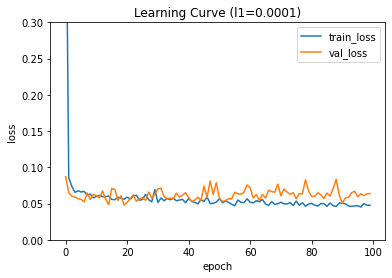

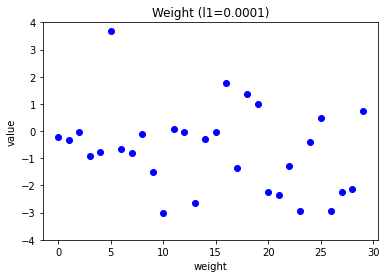

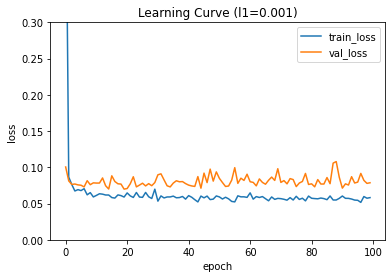

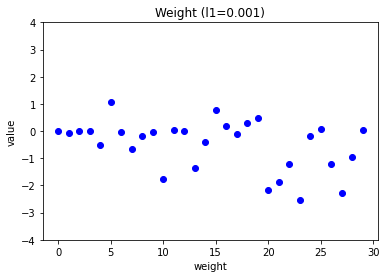

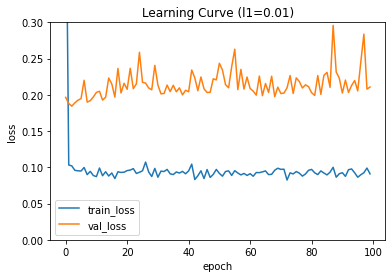

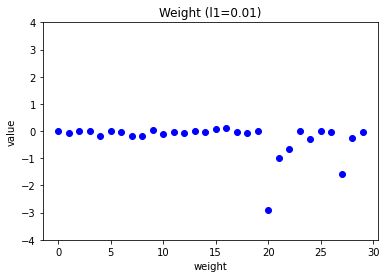

In [45]:
l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
  lyr = SingleLayer(l1=l1)
  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l1={})'.format(l1))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss','val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l1={})'.format(l1))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4,4)
  plt.show()

In [46]:
layer5 = SingleLayer(l1 = 0.001)
layer5.fit(x_train_scaled, y_train, epochs=20)
layer5.score(x_val_scaled, y_val)

0.978021978021978

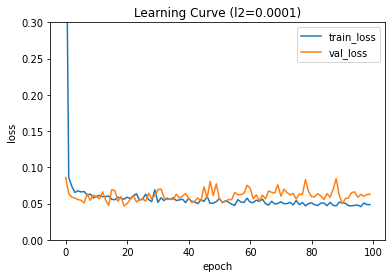

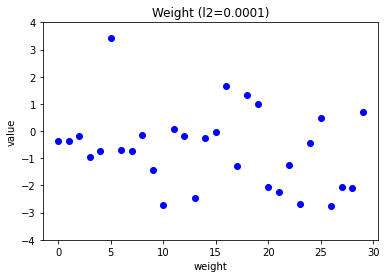

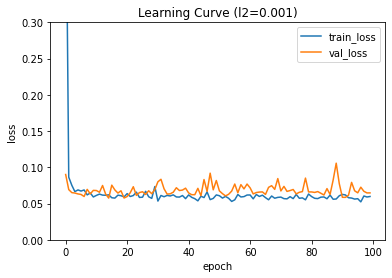

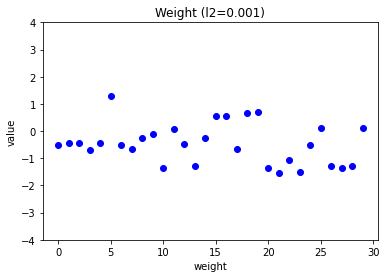

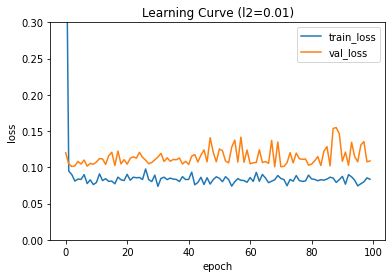

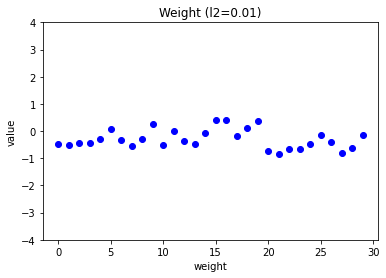

In [47]:
l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
  lyr = SingleLayer(l2=l2)
  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l2={})'.format(l2))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss','val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l2={})'.format(l2))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4,4)
  plt.show()

In [49]:
layer6 = SingleLayer(l2=0.01)
layer6.fit(x_train_scaled, y_train, epochs=50)
layer6.score(x_val_scaled, y_val)

0.978021978021978

In [50]:
np.sum(layer6.predict(x_val_scaled) == y_val)

89

결과를 보니 L1 규제와 동일합니다.
사실 cancer 데이터 세트의 샘플 개수는 아주 적어서 L1 규제를 적용한 모델과 L2모델을 적용한 모델의 성능에는 큰 차이가 없습니다. 다시 말해 두 모델은 모두 검증 샘플에 대하여 옳게 예측한 샘플의 개수가 동일합니다.
여기에서 91개 검증 샘플 중 89개을 올바르게 예측했습니다.

히지만 L1규제를 사용했을 때보다 에포크가 크게 늘어났습니다. L1 규제를 적용할 때는 20번의 에포크 동안 훈련을 했지만 L2 규제를 적용할 때는 50번의 에포크 동안 훈련을 했네요.
가중치를 강하게 제한했기 때문에 검증 세트의 손실값을 일정한 수준으로 유지하면서 알고리즘이 전역 최솟값을 찾는 과정을 오래 반복할 수 있었던 것입니다.

7. SGDClassifier 클래스도 L1 규제, L2 규제를 지원합니다.  
penalty 매개변수에 L1이나 l2를 매개변수 값으로 전달하고 alpha 매개변수에 규제의 강도를 지정하면 됩니다.  
여기서는 cancer 데이터 세트를 사용하여 SGDClassifier 모델에 L2 규제를 적용해 보겠습니다.

In [52]:
sgd = SGDClassifier(loss='log',penalty='l2', alpha=0.001, random_state=42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

0.978021978021978

사이킷런에는 SGDClassifier클래스 이외에도 L1규제와 L2 규제를 지원하는 모델이 많습니다. 예를 들면 LogisticRegression, SVC, LinearSVC 클래스 등이 있는데, 이 클래스들은 페널티 항 대신 주손실 함수의 크기를조절하기 위해 하이퍼파라미터 C를 곱해줍니다. SGDClassifier클래스의 매개변수 alpha를 사용하여 규제를 제어한 것과 비슷하게 매개변수 C를 사용하여 규제를 제어하는 것이죠. 이 떄 C는 alpha와 반대의 역할을 합니다. 즉, 매개변수 C가 커지면 규제가 줄어들고 C가 작으면 규제가 강해집니다. 지금까지 훈련 세트, 검증 세트와 과대적합, 과소적합의 관계를 알아보고 과대적합 문제를 다루기 위해 대표적인 규제 방법을 배웠습니다.

마지막으로 전체 데이터 세트의 샘플 개수가 적을 때 유용하게 사용할 수 있는 또 다른 검증방법인 교차 검증을 살펴보겠습니다.